In [48]:
file_name = "graph_path_planning.ipynb"
import sys
import os
sys.path.insert(0, os.path.abspath(
    os.path.join(os.path.dirname(file_name), '../../src/') ))

from configuration_space_mapping import *
from utils import *
from graph import *

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon as PlottablePoly
from sympy import Polygon, Line, Point
import numpy as np

In [56]:
client_id = connect_2_sim()
test_connection(client_id)

Connected to remote API server
Number of objects in the scene:  43


In [57]:
scene_objects = ['Cuboid_0','Cuboid_1','Cuboid_2',
                 'Cuboid_3','Cuboid_4']
robot_name = './dr20'


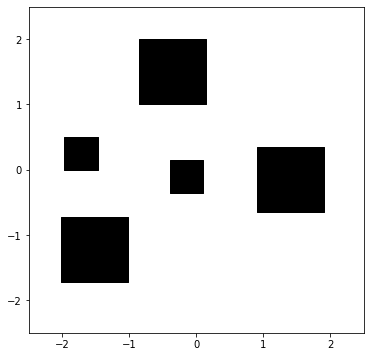

In [17]:
fig, ax = plt.subplots(figsize=(6,6))

obj_points_list = []
obj_plot_polys = []
for obj in scene_objects:
    
    errorCode, objHandl = sim.simxGetObjectHandle(client_id, obj, sim.simx_opmode_blocking)
    error_pos, objPos = sim.simxGetObjectPosition(client_id, objHandl, -1, sim.simx_opmode_streaming)
    error_ang, objAng = sim.simxGetObjectOrientation(client_id, objHandl, -1, sim.simx_opmode_streaming)
    
    objAng = list(reversed(objAng))
    
    points_local = get_bounding_box_corners_local_coordinates(client_id, objHandl)
     
    points_global = map_local_coordinates_to_global_coordinates(points_local, objAng, objPos)
    
    points_poly = [p[:2] for p in points_global]

    poly = np.array(points_poly)
    p = PlottablePoly(poly, facecolor = 'k')
    obj_plot_polys.append(p)
    obj_points_list.append(points_poly)

obj_points_list = np.array(obj_points_list)

p = PatchCollection(obj_plot_polys, color='k')

ax.add_collection(p)

ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])
plt.show()
plt.close(fig)

In [18]:
line_x_coords = np.sort(obj_points_list[:,:,0].flatten())
line_x_coords = np.array([line_x_coords[i] for i in range(0,len(line_x_coords), 2)])
line_x_coords

array([-2.0249995 , -1.9749998 , -1.4749998 , -1.0249995 , -0.85000013,
       -0.3999995 ,  0.1000005 ,  0.14999987,  0.89999998,  1.89999998])

In [19]:
obj_poly_list = []
for obj_ps in obj_points_list:
    p1, p2, p3, p4 = map(Point, obj_ps)
    poly = Polygon(p1, p2, p3, p4)
    obj_poly_list.append(poly)

lines_list = []
for x_coord in line_x_coords:   
    p1, p2 = map(Point, [(x_coord,2.5), (x_coord,-2.5)])
    line = Line(p1,p2)
    lines_list.append(line)

i = 1
lines_intersects = []
for line in lines_list:
    print(f'testing line {i}')
    j = 0
    y_intersects = []
    for poly in obj_poly_list:
        print(f'\ttesting poly {j}')
        intersects = poly.intersection(line)
        try:
            points = [p.evalf() for p in intersects]
        except:
            points = [s.points[0].evalf() for s in intersects]
        print('\t', points)
        if len(points) == 1:
            pass
            #poly_ys = [p.evalf()[1] for p in poly.vertices] #to float
            #max_y = max(poly_ys)
            #min_y = min(poly_ys)
            #y_intersects.append(max_y)
            #y_intersects.append(min_y)
        else:
            for p in points:
                y_intersects.append(p[1])
        j += 1
    lines_intersects.append(y_intersects)
    i += 1

testing line 1
	testing poly 0
	 []
	testing poly 1
	 []
	testing poly 2
	 [Point2D(-2.02499950380445, -1.72499954011317)]
	testing poly 3
	 []
	testing poly 4
	 []
testing line 2
	testing poly 0
	 [Point2D(-1.97499979586041, 0.500000353009273)]
	testing poly 1
	 []
	testing poly 2
	 [Point2D(-1.97499979586041, -1.72499954050974), Point2D(-1.97499979586041, -0.724999540509735)]
	testing poly 3
	 []
	testing poly 4
	 []
testing line 3
	testing poly 0
	 [Point2D(-1.47499979586041, 3.71057391854955e-7), Point2D(-1.47499979586041, 0.500000371057392)]
	testing poly 1
	 []
	testing poly 2
	 [Point2D(-1.47499979586041, -1.72499954447546), Point2D(-1.47499979586041, -0.724999544475455)]
	testing poly 3
	 []
	testing poly 4
	 []
testing line 4
	testing poly 0
	 []
	testing poly 1
	 []
	testing poly 2
	 [Point2D(-1.02499950380445, -1.72499954804461), Point2D(-1.02499950380445, -0.724999548044606)]
	testing poly 3
	 []
	testing poly 4
	 []
testing line 5
	testing poly 0
	 []
	testing poly 1
	 [Po

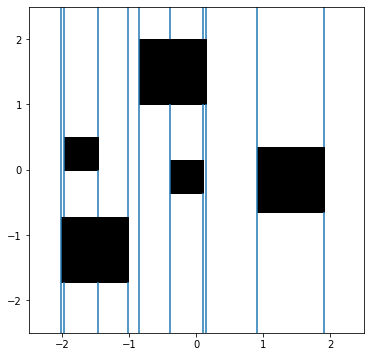

In [20]:
lines_intersects = [sorted(i) for i in lines_intersects]

fig, ax = plt.subplots(figsize=(6,6))

p = PatchCollection(obj_plot_polys, color='k')

ax.add_collection(p)

ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])

for x, ys in zip(line_x_coords, lines_intersects):
    y_min = -2.5
    for i in range(0, len(ys)-1, 2):
        plt.vlines(x, y_min, float(ys[i]))
        y_min = float(ys[i+1])
    plt.vlines(x, y_min, 2.5)

plt.show()

In [21]:
lines_intersects

[[],
 [-1.72499954050974, -0.724999540509735],
 [-1.72499954447546,
  -0.724999544475455,
  3.71057391854955e-7,
  0.500000371057392],
 [-1.72499954804461, -0.724999548044606],
 [],
 [0.999999395277564, 1.99999939527756],
 [-0.349999650495671, 0.150000349504329, 0.999999387810098, 1.99999938781010],
 [0.999999387063361, 1.99999938706336],
 [],
 [-0.649999819229839, 0.350000180770160]]

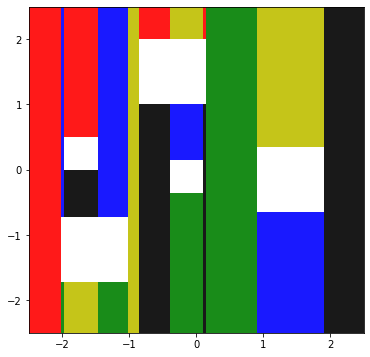

In [22]:
cells_points = []
prev_x = -2.5
for x, ys in zip(line_x_coords, lines_intersects):
    x_min, x_max = prev_x, x
    y_min, y_max = -2.5, 2.5
    
    if len(ys) > 0:
        for i in range(0, len(ys)-1, 2):
            y_max = ys[i]
            cell = [[x_max, y_max], [x_min, y_max], [x_min, y_min], [x_max, y_min]]
            cells_points.append(np.array(cell))
            y_min = ys[i+1]
            y_max = 2.5
        cell = [[x_max, y_max], [x_min, y_max], [x_min, y_min], [x_max, y_min]]
        cells_points.append(np.array(cell))
    else:
        cell = [[x_max, y_max], [x_min, y_max], [x_min, y_min], [x_max, y_min]]
        cells_points.append(np.array(cell))
    prev_x = x

x_min, x_max = x, 2.5
y_min, y_max = -2.5, 2.5
cell = [[x_max, y_max], [x_min, y_max], [x_min, y_min], [x_max, y_min]]
cells_points.append(np.array(cell))


cells_plottable = []
for cell in cells_points:
    p = PlottablePoly(cell, facecolor = 'k')
    cells_plottable.append(p)

import matplotlib.colors
colors = values = np.array([i%5 for i in range(len(cells_plottable))])
cmap = matplotlib.colors.ListedColormap(['r', 'g', 'b', 'y', 'k'])
p = PatchCollection(cells_plottable, cmap=cmap, alpha=0.9)
p.set_array(colors)

fig, ax = plt.subplots(figsize=(6,6))
ax.add_collection(p)

ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])
plt.show()
plt.close(fig)

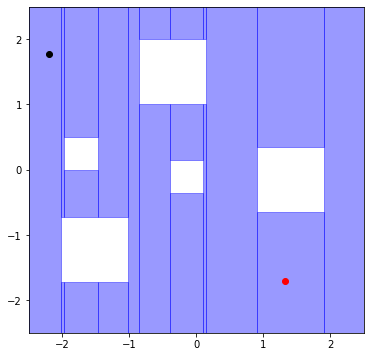

In [23]:
fig, ax = plt.subplots(figsize=(6,6))
p = PatchCollection(cells_plottable, alpha=0.4, color='b')

errorCode, roboHandl = sim.simxGetObjectHandle(client_id, robot_name, sim.simx_opmode_blocking)
error_pos, roboPos = sim.simxGetObjectPosition(client_id, roboHandl, -1, sim.simx_opmode_streaming)
errorCode, goalHandl = sim.simxGetObjectHandle(client_id, './Goal', sim.simx_opmode_blocking)
error_pos, goalPos = sim.simxGetObjectPosition(client_id, goalHandl, -1, sim.simx_opmode_streaming)

ax.add_collection(p)
plt.scatter(roboPos[0], roboPos[1], color='k')
plt.scatter(goalPos[0], goalPos[1], color='r')

ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])
plt.show()
plt.close(fig)

In [25]:
def square_from_array(obj_points):
    p1, p2, p3, p4 = map(Point, obj_points)
    poly = Polygon(p1, p2, p3, p4)
    return poly

cells_poly = []
for cell in cells_points:
    p = square_from_array(cell)
    cells_poly.append(p)

In [31]:
#get robot and goal cell
robo_point = Point(roboPos[:2])
goal_point = Point(goalPos[:2])

robo_cell = -1
goal_cell = -1
for i, cell in zip(range(len(cells_poly)), cells_poly):
    if cell.encloses_point(goal_point):
        goal_cell = i
    elif cell.encloses_point(robo_point):
        robo_cell = i
                   
robo_cell, goal_cell

(0, 17)

In [50]:
connections = []
print('initiating graph')
for i in range(len(cells_poly)):
    #print(f'testing cell {i}:')
    for j in range(i, len(cells_poly)):
        distance = cells_poly[i].distance(cells_poly[j]).evalf()
        if distance < 0.000001:
            connections.append((f'{i}', f'{j}'))
            #print(f'\t neighbour to {j}')
connections

initiating graph


[('0', '1'),
 ('0', '2'),
 ('1', '3'),
 ('2', '4'),
 ('2', '5'),
 ('3', '6'),
 ('4', '7'),
 ('5', '7'),
 ('6', '8'),
 ('7', '8'),
 ('8', '9'),
 ('8', '10'),
 ('9', '11'),
 ('9', '12'),
 ('10', '13'),
 ('11', '14'),
 ('12', '14'),
 ('13', '15'),
 ('14', '16'),
 ('15', '16'),
 ('16', '17'),
 ('16', '18'),
 ('17', '19'),
 ('18', '19')]

In [60]:
errorCode, roboHandl = sim.simxGetObjectHandle(client_id, robot_name, sim.simx_opmode_blocking)
error_pos, roboPos = sim.simxGetObjectPosition(client_id, roboHandl, -1, sim.simx_opmode_streaming)
errorCode, goalHandl = sim.simxGetObjectHandle(client_id, './Goal', sim.simx_opmode_blocking)
error_pos, goalPos = sim.simxGetObjectPosition(client_id, goalHandl, -1, sim.simx_opmode_streaming)

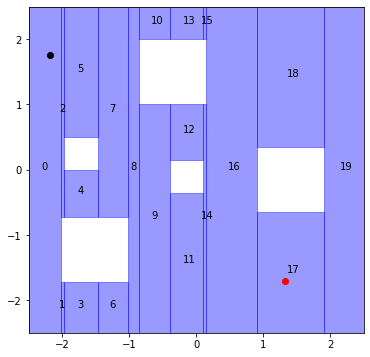

In [70]:
fig, ax = plt.subplots(figsize=(6,6))

p = PatchCollection(cells_plottable, alpha=0.4, color='b')
ax.add_collection(p)

plt.scatter(roboPos[0], roboPos[1], color='k')
plt.scatter(goalPos[0], goalPos[1], color='r')

i=0
for cell in cells_poly:
    centr = cell.centroid.evalf()
    plt.text(centr[0] - 0.05, centr[1], f'{i}')
    i += 1

ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])
plt.show()
plt.close(fig)

AttributeError: 'Point2D' object has no attribute 'to_list'